# Lab_4 Modal Analysis of a Cruise Missile Wing

Data Collection
Obtain acceleration response data from the cruise missile wing upon excitation from an impulse hammer using Bobcat. With the single axis accelerometer (used model PCB 355C22) attached at location 4, strike the wing at five of the marked locations using five impulse averages per case (used PCB Impulse Hammer model 086C03). Be sure to inspect the coherence of the accelerometer as well as the time response and power spectral density of the hammer to ensure good quality data has been collected. The Bobcat default output vectors may not include coherence, if this is the case, the signal will need to be selected during the software setup procedure.

# Obtain FRF and Transfer function

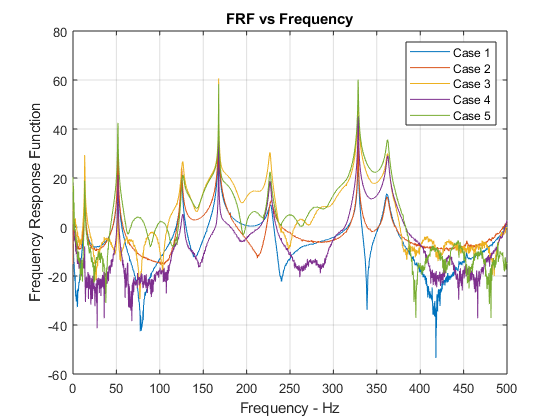

In [1]:
clc; close all; clear all;
%% find Transfer Function for all five cases
figure()
load Lab4_Case1
h1=Hf_chan_2; plot(Freq_domain,20*log10(abs(h1))); hold on;
load Lab4_Case2
h2=Hf_chan_2; plot(Freq_domain,20*log10(abs(h2))); hold on;
load Lab4_Case3
h3=Hf_chan_2; plot(Freq_domain,20*log10(abs(h3))); hold on;
load Lab4_Case4
h4=Hf_chan_2; plot(Freq_domain,20*log10(abs(h4))); hold on;
load Lab4_Case5
h5=Hf_chan_2; plot(Freq_domain,20*log10(abs(h5))); hold on;
xlabel('Frequency - Hz'); ylabel('Frequency Response Function');
legend('Case 1','Case 2', 'Case 3','Case 4','Case 5')
title('FRF vs Frequency'); grid on;
 
tf=[h1,h2,h3,h4,h5];

# Use vibration tool box (mdofcf.m) to Compute modal parameters

In [2]:
% Obtain peak values from FRF graph, fn1, fn2, fn3, fn4, fn5 to use bounds in the function
f1 = 13.44; f2 = 51.7; f3 = 124.7; f4 = 167.8; f5 = 227.8;  % select the peak values from FRF plots for each case %
% f1 case_1 1st peak, f2 case_2 2nd peak, so on

[z1,nf1,u1]=mdofcf(Freq_domain,tf,f1-5,f1+5);   % use -5,+5 lower and upper bounds at the peak value
z(1,1)=z1;
lamda(1,1)=(2*pi*nf1)^2;
s(:,1)=real(u1)

[z2,nf2,u2]=mdofcf(Freq_domain,tf,f2-5,f2+5);
z(2,2)=z2;
lamda(2,2)=(2*pi*nf2)^2;
s(:,2)=real(u2)

[z3,nf3,u3]=mdofcf(Freq_domain,tf,f3-5,f3+5);
z(3,3)=z3;
lamda(3,3)=(2*pi*nf3)^2;
s(:,3)=real(u3)

[z4,nf4,u4]=mdofcf(Freq_domain,tf,f4-5,f4+5);
z(4,4)=z4;
lamda(4,4)=(2*pi*nf4)^2;
s(:,4)=real(u4)

[z5,nf5,u5]=mdofcf(Freq_domain,tf,f5-4,f5+4);
z(5,5)=z5
lamda(5,5)=(2*pi*nf5)^2
s(:,5)=real(u5)

> In mdofcf (line 132)

> In mdofcf (line 162)


s =

  5x1 single column vector

   40.4932
   41.0654
   85.9217
    0.9293
   23.4404

> In mdofcf (line 132)

> In mdofcf (line 162)


s =

  5x2 single matrix

   40.4932 -143.9216
   41.0654 -170.0279
   85.9217  -17.5106
    0.9293   38.9404
   23.4404  529.9288

> In mdofcf (line 132)

> In mdofcf (line 162)


s =

  5x3 single matrix

   40.4932 -143.9216       NaN
   41.0654 -170.0279       NaN
   85.9217  -17.5106       NaN
    0.9293   38.9404       NaN
   23.4404  529.9288       NaN

> In mdofcf (line 132)

> In mdofcf (line 162)


s =

  5x4 single matrix

   1.0e+03 *

    0.0405   -0.1439       NaN   -0.3702
    0.0411   -0.1700       NaN    0.4672
    0.0859   -0.0175       NaN    1.5394
    0.0009    0.0389       NaN    0.1255
    0.0234    0.5299       NaN   -1.2091

> In mdofcf (line 132)

> In mdofcf (line 162)


z =

  5x5 single matrix

    0.0027         0         0         0         0
         0    0.0009         

# Obtain Mass, Damping, Stiffness Matrices

In [ ]:
Dampingratio_mdofcf = [z1, z2, z3, z4, z5]            % Damping ratio's using mdofcf
Naturalfreq_mdofcf = [nf1, nf2, nf3, nf4, nf5]        % Natural Frequency using mdofcf
Modeshape_mdofcf = [u1, u2, u3, u4, u5]               % Mode Shape vector using mdofcf

m=(s'.*eye(5)).*s;              % Mass Matrix
c=(s'.*(2*z*sqrt(lamda))).*s;   % Damping Matrix
k=(s'.*lamda).*s;               % Stiffness Matrix

MM=vpa(m,8)  % use Variable Precision Arithmatic upto 5~8 %
CM=vpa(c,8)  % MM, DM, SM matices in the command window %
KM=vpa(k,8)

# Hammer response

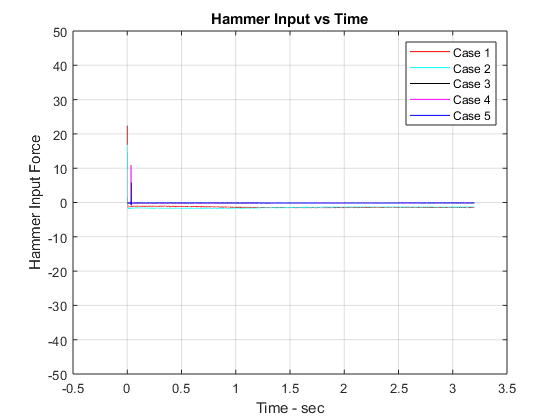

In [5]:
%% Hammer response plots for all five cases
figure
load Lab4_Case1;
Hammer_Input=Time_chan_1;
plot (Time_domain,Hammer_Input,'r');
hold on
load Lab4_Case2;
Hammer_Input=Time_chan_1;
plot (Time_domain,Hammer_Input,'c')
hold on
load Lab4_Case3;
Hammer_Input=Time_chan_1;
plot (Time_domain,Hammer_Input,'k')
hold on
load Lab4_Case4;
Hammer_Input=Time_chan_1;
plot (Time_domain,Hammer_Input,'m')
hold on
load Lab4_Case5;
Hammer_Input=Time_chan_1;
plot (Time_domain,Hammer_Input,'b')
axis([-0.5,3.5,-50,50])
xlabel('Time - sec'); ylabel('Hammer Input Force');
legend('Case 1','Case 2', 'Case 3','Case 4','Case 5')
title('Hammer Input vs Time'); grid on;

# curve fitting using vibration toolbox

In [11]:

load Lab4_Case1
[z1,nf1,u1]=vtb7_4(Freq_domain,Hf_chan_2,f1-5,f1+5)

> In vtb7_4 (line 132)

> In vtb7_4 (line 162)


z1 =

  single

  7.5408e-04


nf1 =

  single

   13.5550


u1 =

  single

  40.5099 - 0.0000i




# Power Spectral Density plot

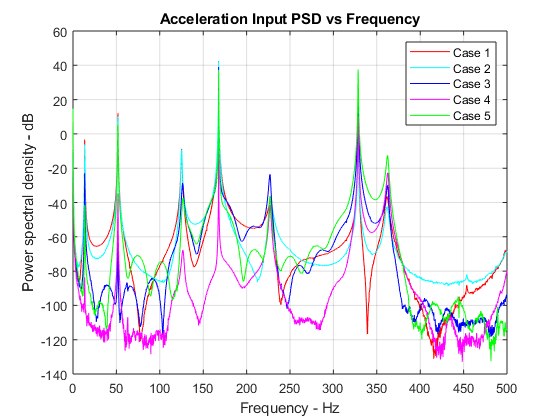

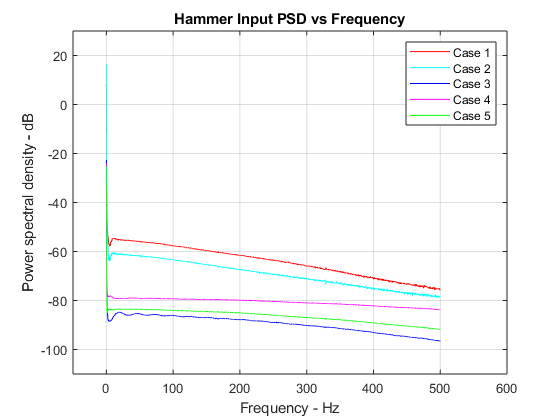

In [3]:
%% To find Power Spectral Density for all five cases

figure
load Lab4_Case1
PSD_dB=20*log10(abs(PSD_chan_1));
plot(Freq_domain,PSD_dB,'r'); hold on
load Lab4_Case2
PSD_dB=20*log10(abs(PSD_chan_1));
plot(Freq_domain,PSD_dB,'c'); hold on
load Lab4_Case3
PSD_dB=20*log10(abs(PSD_chan_1));
plot(Freq_domain,PSD_dB,'b'); hold on
load Lab4_Case4
PSD_dB=20*log10(abs(PSD_chan_1));
plot(Freq_domain,PSD_dB,'m'); hold on
load Lab4_Case5
PSD_dB=20*log10(abs(PSD_chan_1));
plot(Freq_domain,PSD_dB,'g'); hold on
xlabel('Frequency - Hz'); ylabel('Power spectral density - dB');
legend('Case 1','Case 2', 'Case 3','Case 4','Case 5')
title('Hammer Input PSD vs Frequency'); grid on;
axis([-50 600 -110 30])


figure
load Lab4_Case1
PSD_dB=20*log10(abs(PSD_chan_2));
plot(Freq_domain,PSD_dB,'r'); hold on
load Lab4_Case2
PSD_dB=20*log10(abs(PSD_chan_2));
plot(Freq_domain,PSD_dB,'c'); hold on
load Lab4_Case3
PSD_dB=20*log10(abs(PSD_chan_2));
plot(Freq_domain,PSD_dB,'b'); hold on
load Lab4_Case4
PSD_dB=20*log10(abs(PSD_chan_2));
plot(Freq_domain,PSD_dB,'m'); hold on
load Lab4_Case5
PSD_dB=20*log10(abs(PSD_chan_2));
plot(Freq_domain,PSD_dB,'g'); hold on
xlabel('Frequency - Hz'); ylabel('Power spectral density - dB');
legend('Case 1','Case 2', 'Case 3','Case 4','Case 5')
title('Acceleration Input PSD vs Frequency'); grid on;